In [1]:
import pandas as pd
import numpy as np


[Big game](#big_game)


In [2]:
df = pd.read_csv('../04_finaldata/full_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         1714 non-null   int64  
 1   school          1714 non-null   object 
 2   sport           1714 non-null   object 
 3   start_dt        1714 non-null   object 
 4   season_type     1714 non-null   object 
 5   opponent        1714 non-null   object 
 6   result          1714 non-null   int64  
 7   team_points     1714 non-null   int64  
 8   opp_points      1714 non-null   int64  
 9   ot              1714 non-null   int64  
 10  rank            1340 non-null   object 
 11  opponent_rank   514 non-null    float64
 12  end_inc_window  1714 non-null   object 
 13  attendance      759 non-null    float64
 14  incident_id     1172 non-null   float64
 15  offense_id      1172 non-null   float64
 16  offense_name    1172 non-null   object 
 17  incident_date   1172 non-null   o

In [4]:
# place games in chronological order
df = df.sort_values('start_dt')
df.head()

,game_id,school,sport,start_dt,season_type,opponent,result,team_points,opp_points,ot,rank,opponent_rank,end_inc_window,attendance,incident_id,offense_id,offense_name,incident_date
318,132,michigan state,football,2009-09-05 12:00:00,regular,montana state,1,44,3,0,NaN,NaN,2009-09-05 23:00:00,0.0,51477851.0,55414365.0,All Other Larceny,2009-09-05 17:00:00
1657,0,michigan,football,2009-09-05 15:30:00,regular,western michigan,1,31,7,0,NaN,NaN,2009-09-06 02:30:00,0.0,50954457.0,55757376.0,Pocket-picking,2009-09-05 16:00:00
57,133,michigan state,football,2009-09-12 12:00:00,regular,central michigan,0,27,29,0,NaN,NaN,2009-09-12 23:00:00,0.0,51477882.0,55414369.0,Simple Assault,2009-09-12 14:00:00
59,133,michigan state,football,2009-09-12 12:00:00,regular,central michigan,0,27,29,0,NaN,NaN,2009-09-12 23:00:00,0.0,51477883.0,55414370.0,Purse-snatching,2009-09-12 16:00:00
60,133,michigan state,football,2009-09-12 12:00:00,regular,central michigan,0,27,29,0,NaN,NaN,2009-09-12 23:00:00,0.0,51477884.0,55411626.0,Theft From Building,2009-09-12 21:00:00


In [5]:
df['rank'] = df['rank'].replace('-', np.nan)
df['opponent_rank'] = df['opponent_rank'].replace('-', np.nan)
df['rank'] = df['rank'].astype('float')
df['opponent_rank'] = df['opponent_rank'].astype('float')

In [6]:
# need hour column
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['hour'] = df['incident_date'].dt.hour

In [28]:
# DataFrame w/ number of incidents per game as column
df['incident_count'] = df.groupby(['game_id'])['incident_id'].transform('count')


&nbsp;

## Exploring how poll rank affects incidents


In [8]:
df['top_25_matchup'] = np.where((df['rank'].notnull()) & (df['opponent_rank'].notnull()), 1, 0)
df['top_10_matchup'] = np.where((df['rank'] <=10) & (df['opponent_rank'] <= 10), 1, 0)

In [9]:
# count incidents after top 25 game vs. all incidents that occur after a game
print('{:.2f}'.format(len(df[df['top_25_matchup'] == 1]) / len(df)))
print('{:.2f}'.format(len(df[df['top_10_matchup'] == 1]) / len(df)))

0.17
0.04


In [10]:
# what is the number of games that are top 25 out of the whole?
df_nodups = df.drop_duplicates('game_id')

print(len(df_nodups[df_nodups['top_25_matchup'] == 1]), 
      'out of', 
      len(df_nodups), 
      'Michigan / Michigan State games (football or basketball) were top 25 matchups -', 
      '{:.2f}'.format(len(df_nodups[df_nodups['top_25_matchup'] == 1]) / len(df_nodups) * 100), 'percent')

print(len(df_nodups[df_nodups['top_10_matchup'] == 1]), 
      'out of', 
      len(df_nodups), 
      'Michigan / Michigan State games (football or basketball) were top 25 matchups -', 
      '{:.2f}'.format(len(df_nodups[df_nodups['top_10_matchup'] == 1]) / len(df_nodups) * 100), 'percent')

166 out of 993 Michigan / Michigan State games (football or basketball) were top 25 matchups - 16.72 percent
42 out of 993 Michigan / Michigan State games (football or basketball) were top 25 matchups - 4.23 percent


In [11]:
# do ranked games where losses occur have more incidents?
print('{:.2f}'.format(len(df[(df['top_25_matchup'] == 1) & (df['result'] == 0)]) / len(df[df['result'] == 0])))
print('{:.2f}'.format(len(df[(df['top_10_matchup'] == 1) & (df['result'] == 0)]) / len(df[df['result'] == 0])))

0.29
0.07


In [12]:
# do ranked games where wins occur have more incidents?
print('{:.2f}'.format(len(df[(df['top_25_matchup'] == 1) & (df['result'] == 1)]) / len(df[df['result'] == 1])))
print('{:.2f}'.format(len(df[(df['top_10_matchup'] == 1) & (df['result'] == 1)]) / len(df[df['result'] == 1])))

0.13
0.03



People tend to react less negatively when it's an important game, and their team wins.\
The negative emotion assocaited with a loss seems to have a larger effect actions (frequency of reported incidents).


In [13]:
# what is the mean number of incidents for top 25 and top 10 matchups?
print(df[df['top_25_matchup'] == 1].groupby('game_id')['incident_id'].agg('count').mean())
print(df[df['top_10_matchup'] == 1].groupby('game_id')['incident_id'].agg('count').mean())

1.1927710843373494
1.1428571428571428


In [37]:
print(df[df['sport'] == 'football'].groupby('game_id')['incident_id'].agg('count').mean())
print(df[(df['top_25_matchup'] == 1) & (df['sport'] == 'football')].groupby('game_id')['incident_id'].agg('count').mean())
print(df[(df['top_10_matchup'] == 1) & (df['sport'] == 'football')].groupby('game_id')['incident_id'].agg('count').mean())
print(df[(df['big_game'] == 1) & (df['sport'] == 'football')].groupby('game_id')['incident_id'].agg('count').mean())

2.6741573033707864
2.803921568627451
3.0
2.7



!!! The mean of incidents occurring when it's a top 10 matchup is actually *higher* for football - interesting


In [15]:
print(df[df['sport'] ==  'basketball'].groupby('game_id')['incident_id'].agg('count').mean())
print(df[(df['top_25_matchup'] == 1) & (df['sport'] == 'basketball')].groupby('game_id')['incident_id'].agg('count').mean())
print(df[(df['top_10_matchup'] == 1) & (df['sport'] == 'basketball')].groupby('game_id')['incident_id'].agg('count').mean())

0.6308539944903582
0.4782608695652174
0.4838709677419355



Basketball shows the opposite effect: incidents tend to go down for bigger games.\
Possible confounding factors exist for basketball, like weather for the time of year and games played mid-week vs. Saturday.



&nbsp;

## Big game classification<a id='big_game'></a>



In [16]:
# https://stackoverflow.com/questions/30631841/pandas-how-do-i-assign-values-based-on-multiple-conditions-for-existing-columns

conditions = [
    df['school'].eq('michigan') & df['opponent'].isin(['ohio state', 'notre dame', 'michigan state', 'michigan-state']),
    df['school'].eq('michigan-state') & df['opponent'].isin(['michigan']),
    df['top_10_matchup'].eq(1),
    df['top_25_matchup'].eq(1)
]

# 1: A rivalry game for Michigan or Michigan State
# 2: A top 10 matchup
# 3: A top 25 matchup
choices = [1, 1, 2, 3]

df['big_game'] = np.select(conditions, choices, default=0)

In [17]:
df[df['big_game'] == 1][:15]

,game_id,school,sport,start_dt,season_type,opponent,result,team_points,opp_points,ot,...,attendance,incident_id,offense_id,offense_name,incident_date,hour,inc_count,top_25_matchup,top_10_matchup,big_game
374,1,michigan,football,2009-09-12 15:30:00,regular,notre dame,1,38,34,0,...,0.0,50955371.0,55778185.0,All Other Larceny,2009-09-12 17:00:00,17.0,5,0,0,1
372,1,michigan,football,2009-09-12 15:30:00,regular,notre dame,1,38,34,0,...,0.0,50954489.0,55767540.0,Theft From Motor Vehicle,2009-09-12 17:00:00,17.0,5,0,0,1
371,1,michigan,football,2009-09-12 15:30:00,regular,notre dame,1,38,34,0,...,0.0,50954487.0,55757380.0,False Pretenses/Swindle/Confidence Game,2009-09-12 16:00:00,16.0,5,0,0,1
370,1,michigan,football,2009-09-12 15:30:00,regular,notre dame,1,38,34,0,...,0.0,50955412.0,55757393.0,Destruction/Damage/Vandalism of Property,2009-09-12 23:00:00,23.0,5,0,0,1
373,1,michigan,football,2009-09-12 15:30:00,regular,notre dame,1,38,34,0,...,0.0,50954488.0,55756845.0,Simple Assault,2009-09-12 16:00:00,16.0,5,0,0,1
848,4,michigan,football,2009-10-03 12:00:00,regular,michigan state,0,20,26,1,...,0.0,50955386.0,55778188.0,Shoplifting,2009-10-03 19:00:00,19.0,2,0,0,1
847,4,michigan,football,2009-10-03 12:00:00,regular,michigan state,0,20,26,1,...,0.0,50955387.0,55767559.0,Drug/Narcotic Violations,2009-10-03 21:00:00,21.0,2,0,0,1
1418,11,michigan,football,2009-11-21 12:00:00,regular,ohio state,0,10,21,0,...,0.0,50956385.0,55778215.0,Shoplifting,2009-11-21 15:00:00,15.0,6,0,0,1
1419,11,michigan,football,2009-11-21 12:00:00,regular,ohio state,0,10,21,0,...,0.0,50957313.0,55764825.0,All Other Larceny,2009-11-21 12:00:00,12.0,6,0,0,1
1417,11,michigan,football,2009-11-21 12:00:00,regular,ohio state,0,10,21,0,...,0.0,50956382.0,55778214.0,Drug/Narcotic Violations,2009-11-21 12:00:00,12.0,6,0,0,1


In [18]:
# what's the mean number of incidents generated from football rivlary games?
print(df[(df['big_game'] == 1) & (df['sport'] == 'football')].groupby('game_id')['incident_id'].agg('count').mean())
# basketball?
print(df[(df['big_game'] == 1) & (df['sport'] == 'basketball')].groupby('game_id')['incident_id'].agg('count').mean())

2.7
0.5714285714285714



<a id='corrs'></a>



&nbsp;

## Correlations


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

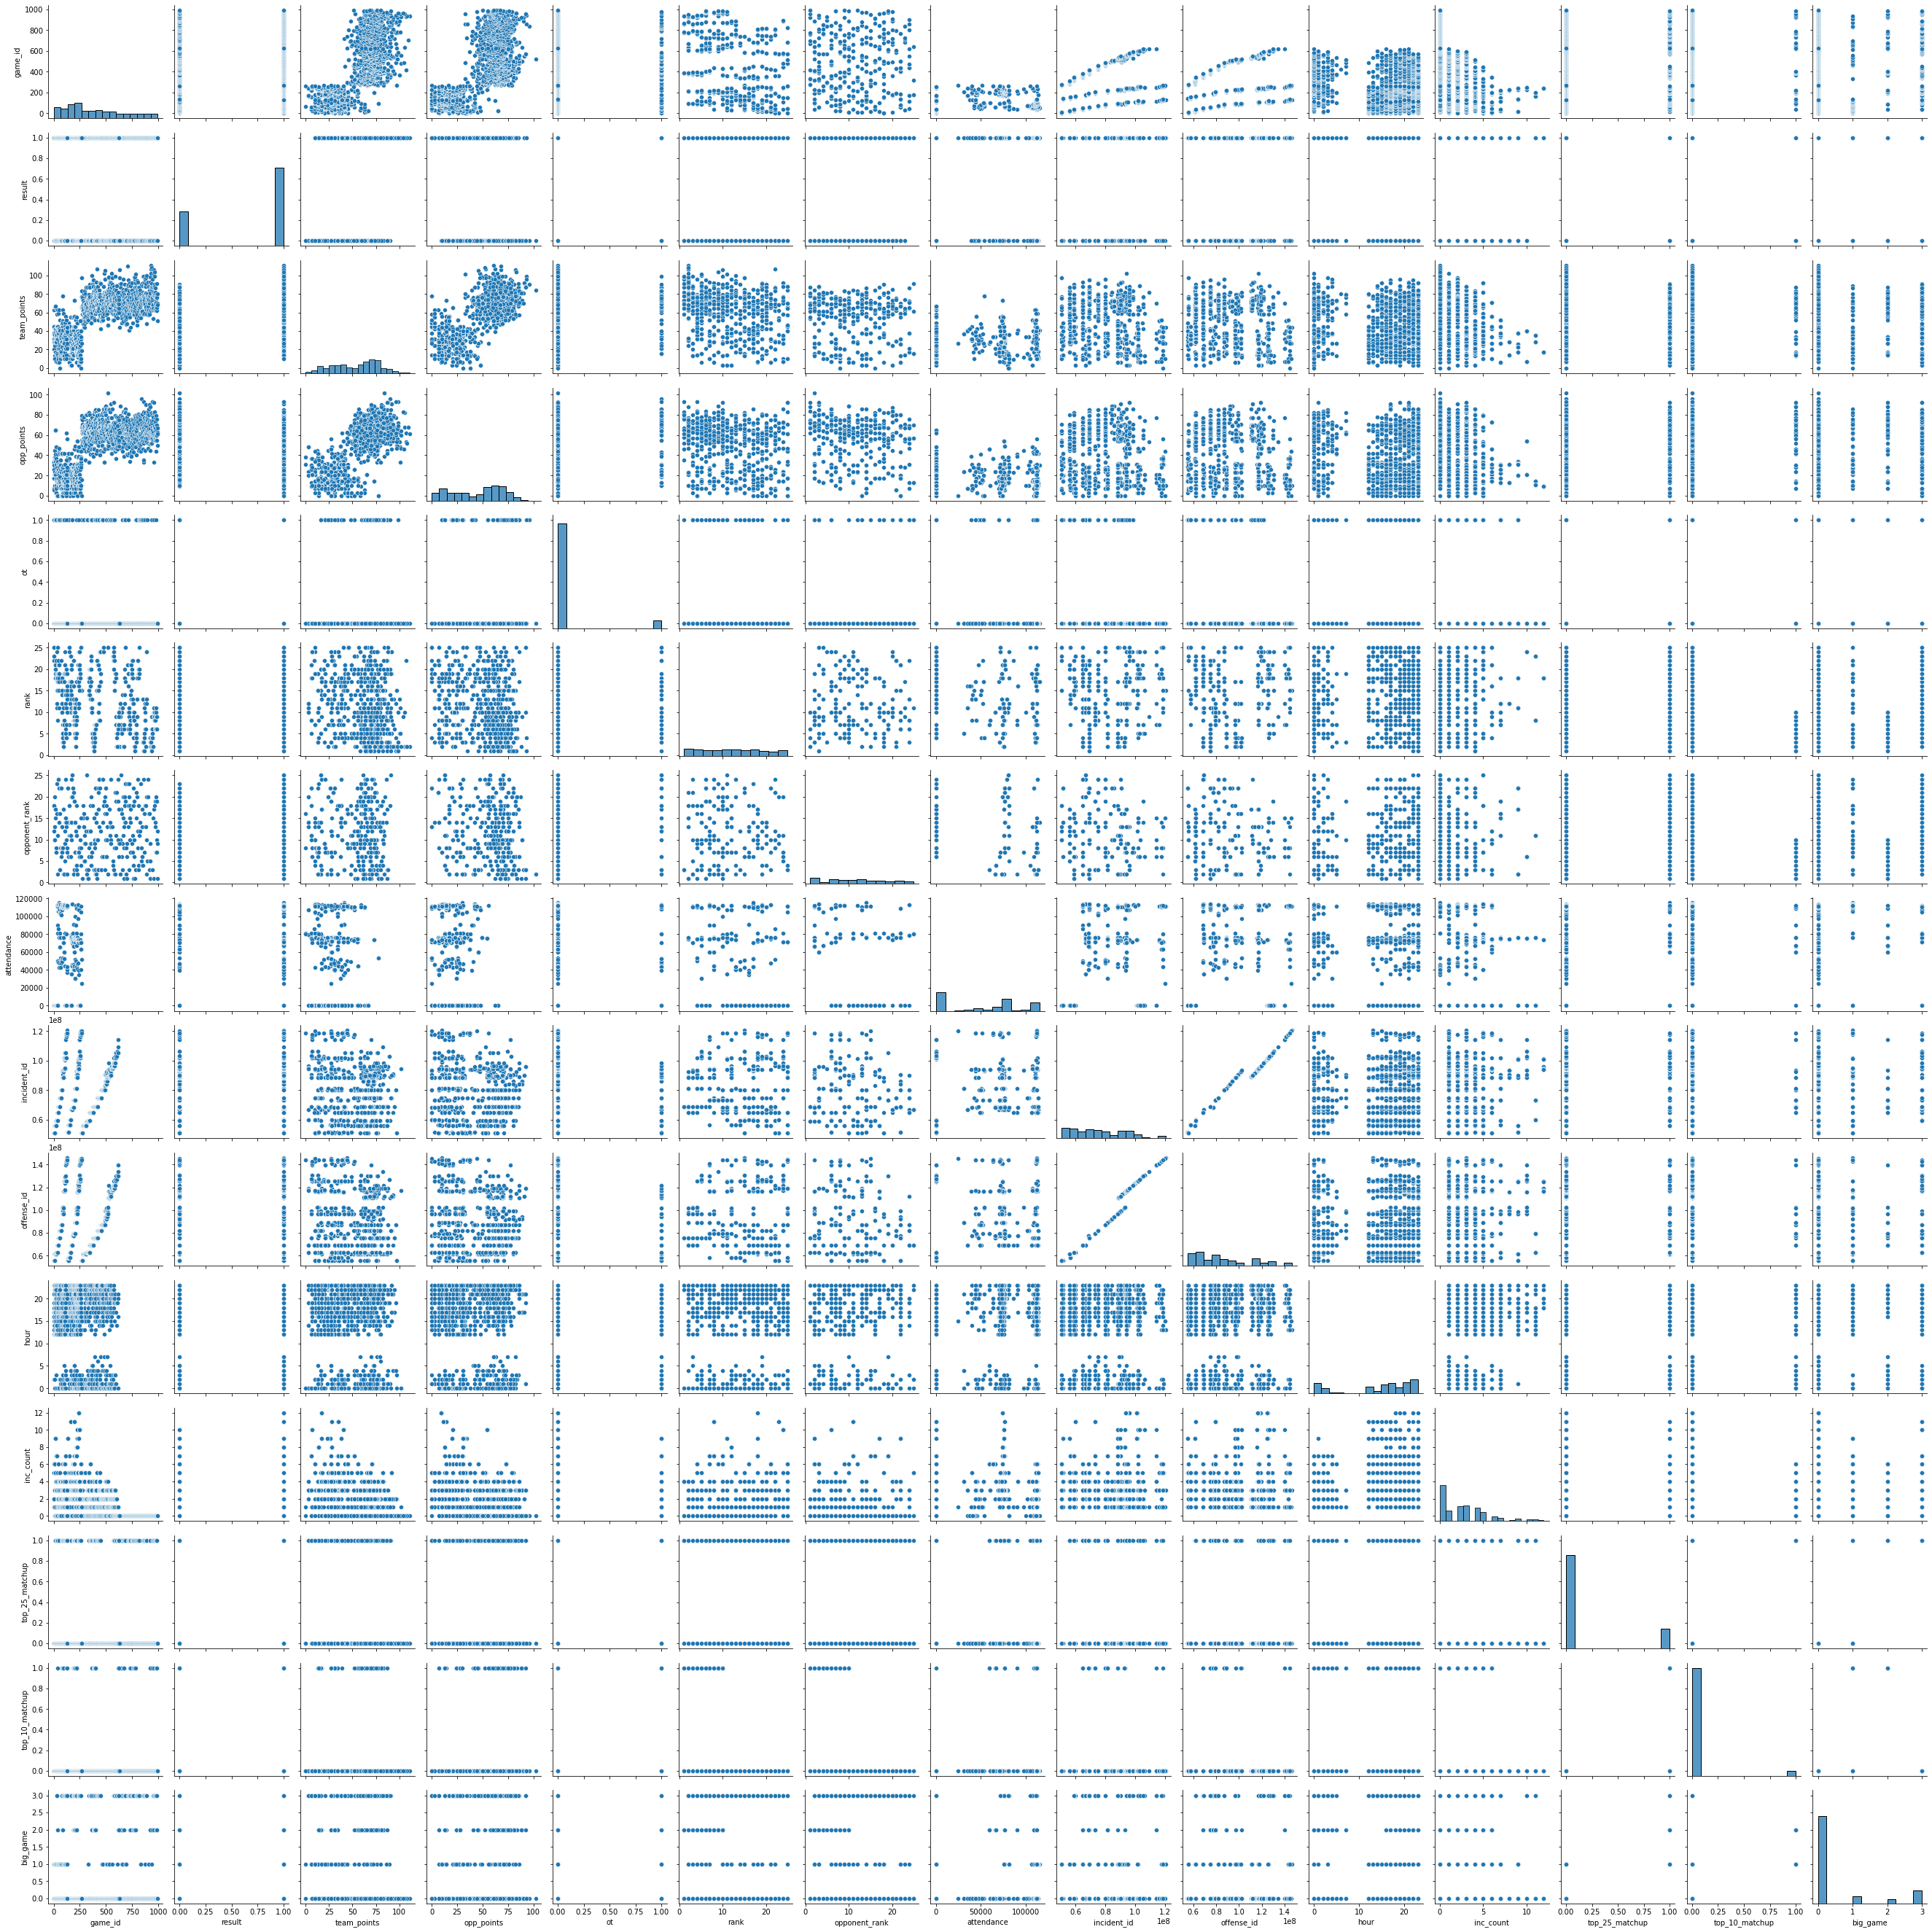

In [20]:
sns.pairplot(df)

In [22]:
df[(df['big_game'] == 1) & (df['sport'] == 'football') == 1]['hour']

374     17.0
372     17.0
371     16.0
370     23.0
373     16.0
        ... 
682     20.0
998     13.0
999     13.0
997     13.0
1556    14.0
Name: hour, Length: 89, dtype: float64

In [23]:
df[(df['big_game'] == 1) & (df['sport'] == 'football')]

,game_id,school,sport,start_dt,season_type,opponent,result,team_points,opp_points,ot,...,attendance,incident_id,offense_id,offense_name,incident_date,hour,inc_count,top_25_matchup,top_10_matchup,big_game
374,1,michigan,football,2009-09-12 15:30:00,regular,notre dame,1,38,34,0,...,0.0,50955371.0,55778185.0,All Other Larceny,2009-09-12 17:00:00,17.0,5,0,0,1
372,1,michigan,football,2009-09-12 15:30:00,regular,notre dame,1,38,34,0,...,0.0,50954489.0,55767540.0,Theft From Motor Vehicle,2009-09-12 17:00:00,17.0,5,0,0,1
371,1,michigan,football,2009-09-12 15:30:00,regular,notre dame,1,38,34,0,...,0.0,50954487.0,55757380.0,False Pretenses/Swindle/Confidence Game,2009-09-12 16:00:00,16.0,5,0,0,1
370,1,michigan,football,2009-09-12 15:30:00,regular,notre dame,1,38,34,0,...,0.0,50955412.0,55757393.0,Destruction/Damage/Vandalism of Property,2009-09-12 23:00:00,23.0,5,0,0,1
373,1,michigan,football,2009-09-12 15:30:00,regular,notre dame,1,38,34,0,...,0.0,50954488.0,55756845.0,Simple Assault,2009-09-12 16:00:00,16.0,5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,127,michigan,football,2019-10-26 19:30:00,regular,notre dame,1,45,14,0,...,111909.0,117842039.0,142961976.0,Simple Assault,2019-10-26 20:00:00,20.0,1,1,0,1
998,129,michigan,football,2019-11-16 12:00:00,regular,michigan state,1,44,10,0,...,111496.0,120522952.0,145996240.0,Counterfeiting/Forgery,2019-11-16 13:00:00,13.0,3,0,0,1
999,129,michigan,football,2019-11-16 12:00:00,regular,michigan state,1,44,10,0,...,111496.0,118827189.0,144059817.0,Simple Assault,2019-11-16 13:00:00,13.0,3,0,0,1
997,129,michigan,football,2019-11-16 12:00:00,regular,michigan state,1,44,10,0,...,111496.0,118824148.0,144062316.0,Simple Assault,2019-11-16 13:00:00,13.0,3,0,0,1


<AxesSubplot:xlabel='hour', ylabel='Count'>

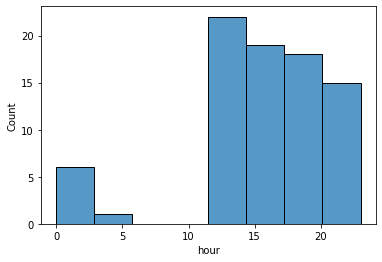

In [24]:
# scatterplot of high-incident games vs. hour
# sns.scatterplot(df[df['big_game'] == 1]['hour'], df[df['big_game'] == 1]['big_game'])
sns.histplot(df[(df['big_game'] == 1) & (df['sport'] == 'football')]['hour'])

In [30]:
df.columns

Index(['game_id', 'school', 'sport', 'start_dt', 'season_type', 'opponent',
       'result', 'team_points', 'opp_points', 'ot', 'rank', 'opponent_rank',
       'end_inc_window', 'attendance', 'incident_id', 'offense_id',
       'offense_name', 'incident_date', 'hour', 'inc_count', 'top_25_matchup',
       'top_10_matchup', 'big_game', 'incident_count'],
      dtype='object')

In [35]:
groupby_gameid = df.groupby('game_id')
gropuby_gameid

<AxesSubplot:>

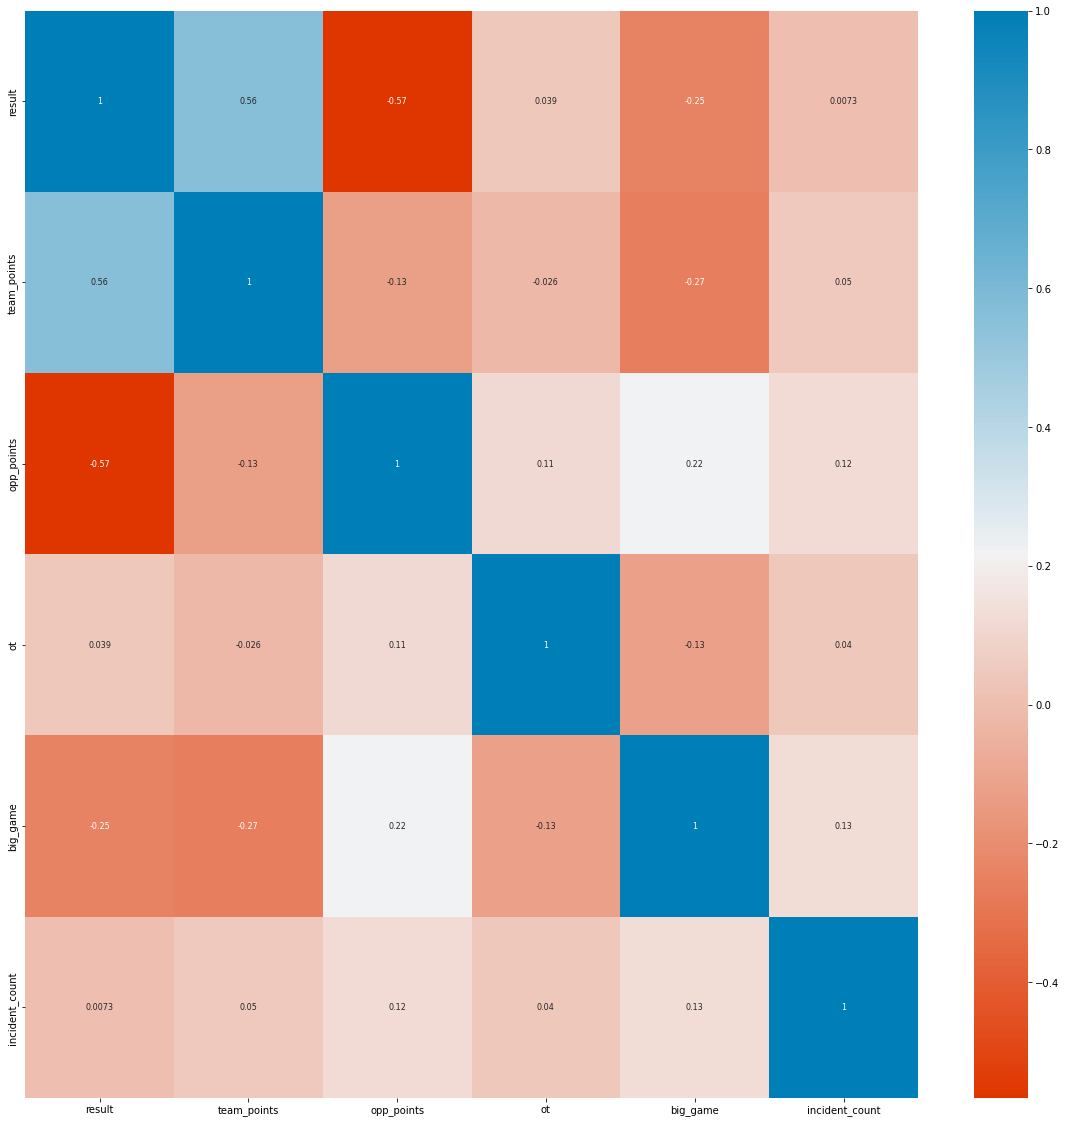

In [34]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap((df[df['sport'] == 'football'][['result', 'team_points', 'opp_points', 'start_dt', 'offense_name', 'ot', 'big_game', 'top_25_matchup', 'incident_count']])
            .corr(method='spearman'), 
            cmap=sns.diverging_palette(16, 240, s=100, l=50, as_cmap=True), 
            annot=True, 
            annot_kws={"fontsize":8}
           )